<a href="https://colab.research.google.com/github/AgustinCocciardi/IA_Tps/blob/main/Features_Originales_Pandas_Trabajo_Pr%C3%A1ctico_ML_Regresi%C3%B3n_Predicci%C3%B3n_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico ML - Regresión Lineal - Predicción - Eficiencia Energética

---



Este dataset lo obtuvimos del repositorio de aprendizaje automático de UCI.
https://archive.ics.uci.edu/ml/datasets/energy+efficiency

Este estudio analizó la evaluación de los requisitos de carga de calefacción y carga de refrigeración de los edificios (es decir, la eficiencia energética) en función de los parámetros del edificio.

Realizamos análisis energéticos utilizando 12 formas de edificios diferentes. Los edificios se diferencian en cuanto a la superficie acristalada, la distribución de la superficie acristalada y la orientación, entre otros parámetros.

Features:
- Relative_Compactness
- Surface_Area
- Wall_Area
- Roof_Area
- Overall_Height
- Orientation
- Glazing_Area
- Glazing_Area_Distribution

Predict:
Heating_Load
Cooling_Load

# Contenido Teórico y Práctico para Desarrollo del Trabajo Práctico

**Importación Librerías**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# LINK SKLEARN LINEAR REGRESSION: https://scikit-learn.org/stable/search.html?q=linear+regression

**Carga Dataset**

In [2]:
dataset = pd.read_csv('/content/03_Energy-Efficiency_Dataset.csv')

**Análisis Dataset**

In [3]:
print('ENERGY EFFICIENCY DATASET - HEAD: \n', dataset.head(5))

ENERGY EFFICIENCY DATASET - HEAD: 
    Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.3

In [4]:
print('ENERGY EFFICIENCY DATASET - SHAPE: ', dataset.shape)

ENERGY EFFICIENCY DATASET - SHAPE:  (768, 10)


In [5]:
print('ENERGY EFFICIENCY DATASET - INFO: \n', dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
ENERGY EFFICIENCY DATASET - INFO: 
 None


In [6]:
print('ENERGY EFFICIENCY DATASET - STATISTICS: \n', dataset.describe())

ENERGY EFFICIENCY DATASET - STATISTICS: 
        Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.5000

**Análisis Datos**

Coeficientes Correlación (Ver referencia: [correlation matrix](https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/))
Un coeficiente de correlación (normalmente denominado r) es un número único que describe el alcance de la relación lineal entre dos variables. Un valor de +1 indica una linealidad perfecta (las dos variables se mueven juntas, como "altura en pulgadas" y "altura en centímetros"). Un valor de r = 0 indica que no hay correlación (las variables son independientes) y r = -1 indica que las variables están inversamente correlacionadas (un aumento en una variable se asocia con una disminución en la otra).

ENERGY EFFICIENCY DATASET - CORRELATION MATRIX: 
                            Relative_Compactness  Surface_Area  Wall_Area  \
Relative_Compactness                       1.00         -0.99      -0.20   
Surface_Area                              -0.99          1.00       0.20   
Wall_Area                                 -0.20          0.20       1.00   
Roof_Area                                 -0.87          0.88      -0.29   
Overall_Height                             0.83         -0.86       0.28   
Orientation                                0.00         -0.00      -0.00   
Glazing_Area                              -0.00          0.00      -0.00   
Glazing_Area_Distribution                 -0.00          0.00       0.00   
Heating_Load                               0.62         -0.66       0.46   
Cooling_Load                               0.63         -0.67       0.43   

                           Roof_Area  Overall_Height  Orientation  \
Relative_Compactness           -0.87        

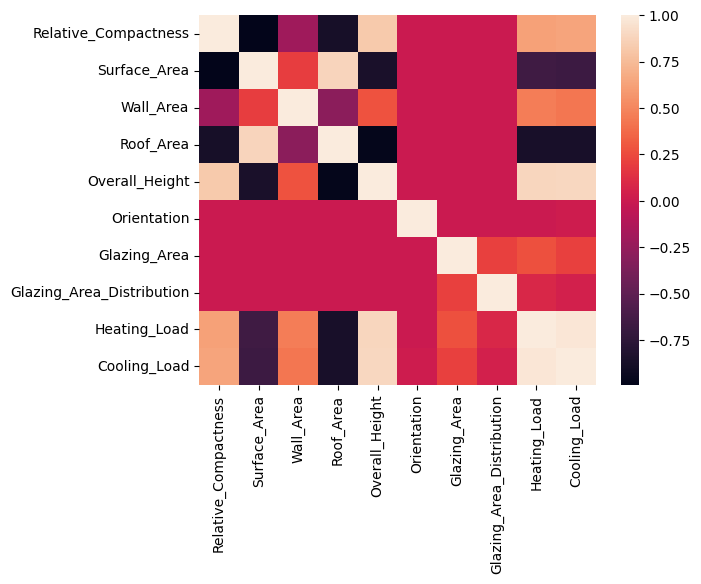

In [7]:
cormat = dataset.corr()
print('ENERGY EFFICIENCY DATASET - CORRELATION MATRIX: \n', round(cormat,2))
sns.heatmap(cormat);

Visualización de Relación Lineal entre Pares de Features

In [ ]:
sns.pairplot(dataset[[
'Relative_Compactness',
'Surface_Area',
'Wall_Area',
'Roof_Area',
'Overall_Height',
'Orientation',
'Glazing_Area',
'Glazing_Area_Distribution',
'Heating_Load',
'Cooling_Load',
 ]]);

Otra técnica utilizada para identificar relación entre features para seleccionar las más relevantes podemos investigar [mutual_info de scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression) y [ejemplo](https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a)

In [8]:
x = dataset.drop(labels=['Heating_Load','Cooling_Load'], axis=1)
x

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [9]:
y = dataset['Heating_Load']
y

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64

In [10]:
x_train_features, x_test_features, y_train_features, y_test_features = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [11]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train_features, y_train_features)
print('ENERGY EFFICIENCY DATASET - FEATURE COLS - MUTUAL INFO: \n', mutual_info)

ENERGY EFFICIENCY DATASET - FEATURE COLS - MUTUAL INFO: 
 [1.62668647 1.62995658 1.03809523 0.86620754 0.64976881 0.
 0.65953166 0.16794003]


In [12]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train_features.columns
mutual_info.sort_values(ascending=False)

Surface_Area                 1.629957
Relative_Compactness         1.626686
Wall_Area                    1.038095
Roof_Area                    0.866208
Glazing_Area                 0.659532
Overall_Height               0.649769
Glazing_Area_Distribution    0.167940
Orientation                  0.000000
dtype: float64

<Axes: >

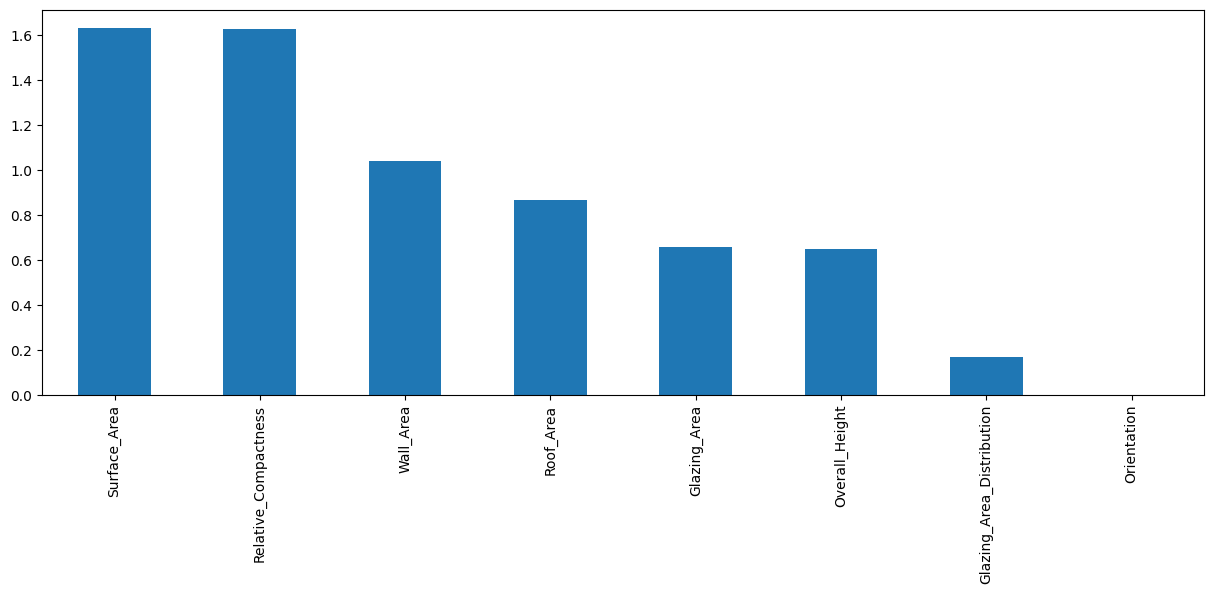

In [13]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

**Determinación Features Cols**

In [14]:
feature_cols = [
'Relative_Compactness',
'Wall_Area',
'Overall_Height']
x = dataset[feature_cols]
print('ENERGY EFFICIENCY DATASET - X (FEATURES COLS): \n', x)
y = dataset.Heating_Load
print('ENERGY EFFICIENCY DATASET - Y (PREDICTION LABEL): \n', y)

ENERGY EFFICIENCY DATASET - X (FEATURES COLS): 
      Relative_Compactness  Wall_Area  Overall_Height
0                    0.98      294.0             7.0
1                    0.98      294.0             7.0
2                    0.98      294.0             7.0
3                    0.98      294.0             7.0
4                    0.90      318.5             7.0
..                    ...        ...             ...
763                  0.64      343.0             3.5
764                  0.62      367.5             3.5
765                  0.62      367.5             3.5
766                  0.62      367.5             3.5
767                  0.62      367.5             3.5

[768 rows x 3 columns]
ENERGY EFFICIENCY DATASET - Y (PREDICTION LABEL): 
 0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64


**Separación Set de Datos**

In [15]:
set_test_size = 0.2

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=set_test_size, random_state=0, shuffle=True)

In [17]:
x_train = x_train.values

In [18]:
x_train

array([[  0.74, 245.  ,   3.5 ],
       [  0.76, 416.5 ,   7.  ],
       [  0.9 , 318.5 ,   7.  ],
       ...,
       [  0.9 , 318.5 ,   7.  ],
       [  0.71, 269.5 ,   3.5 ],
       [  0.82, 318.5 ,   7.  ]])

In [19]:
y_train = y_train.values

In [20]:
x_test = x_test.values

In [21]:
x_test

array([[  0.66, 318.5 ,   3.5 ],
       [  0.74, 245.  ,   3.5 ],
       [  0.79, 343.  ,   7.  ],
       [  0.82, 318.5 ,   7.  ],
       [  0.98, 294.  ,   7.  ],
       [  0.9 , 318.5 ,   7.  ],
       [  0.98, 294.  ,   7.  ],
       [  0.82, 318.5 ,   7.  ],
       [  0.86, 294.  ,   7.  ],
       [  0.82, 318.5 ,   7.  ],
       [  0.71, 269.5 ,   3.5 ],
       [  0.79, 343.  ,   7.  ],
       [  0.66, 318.5 ,   3.5 ],
       [  0.79, 343.  ,   7.  ],
       [  0.79, 343.  ,   7.  ],
       [  0.86, 294.  ,   7.  ],
       [  0.71, 269.5 ,   3.5 ],
       [  0.9 , 318.5 ,   7.  ],
       [  0.62, 367.5 ,   3.5 ],
       [  0.71, 269.5 ,   3.5 ],
       [  0.69, 294.  ,   3.5 ],
       [  0.98, 294.  ,   7.  ],
       [  0.71, 269.5 ,   3.5 ],
       [  0.79, 343.  ,   7.  ],
       [  0.74, 245.  ,   3.5 ],
       [  0.71, 269.5 ,   3.5 ],
       [  0.62, 367.5 ,   3.5 ],
       [  0.74, 245.  ,   3.5 ],
       [  0.71, 269.5 ,   3.5 ],
       [  0.79, 343.  ,   7.  ],
       [  

In [22]:
y_test = y_test.values

**Normalizacion**

In [23]:
import pandas as pd

In [25]:
data = pd.DataFrame(x_train, columns=['Relative_Compactness', 'Wall_Area', 'Overall_Height'])

In [26]:
z_scores = (data - data.mean()) / data.std()

In [27]:
z_scores

,Relative_Compactness,Wall_Area,Overall_Height
0,-0.210804,-1.708151,-0.983042
1,-0.020740,2.271054,1.015593
2,1.309708,-0.002777,1.015593
3,0.549452,-0.002777,1.015593
4,-0.971060,-0.002777,-0.983042
...,...,...,...
609,-1.161123,0.565680,-0.983042
610,2.069963,-0.571235,1.015593
611,1.309708,-0.002777,1.015593
612,-0.495900,-1.139693,-0.983042


In [28]:
nuevo_x_train = z_scores.values

In [29]:
nuevo_x_train

array([[-0.2108038 , -1.70815096, -0.98304235],
       [-0.02073987,  2.27105382,  1.01559342],
       [ 1.3097076 , -0.00277748,  1.01559342],
       ...,
       [ 1.3097076 , -0.00277748,  1.01559342],
       [-0.49589969, -1.13969313, -0.98304235],
       [ 0.5494519 , -0.00277748,  1.01559342]])

In [30]:
data = pd.DataFrame(x_test, columns=['Relative_Compactness', 'Wall_Area', 'Overall_Height'])

In [31]:
z_scores = (data - data.mean()) / data.std()

In [32]:
nuevo_x_test = z_scores.values

In [33]:
nuevo_x_test

array([[-1.03847364,  0.01041821, -1.06371684],
       [-0.29722247, -1.59398603, -1.06371684],
       [ 0.16605952,  0.54521962,  0.93399527],
       [ 0.44402871,  0.01041821,  0.93399527],
       [ 1.92653106, -0.5243832 ,  0.93399527],
       [ 1.18527988,  0.01041821,  0.93399527],
       [ 1.92653106, -0.5243832 ,  0.93399527],
       [ 0.44402871,  0.01041821,  0.93399527],
       [ 0.81465429, -0.5243832 ,  0.93399527],
       [ 0.44402871,  0.01041821,  0.93399527],
       [-0.57519166, -1.05918462, -1.06371684],
       [ 0.16605952,  0.54521962,  0.93399527],
       [-1.03847364,  0.01041821, -1.06371684],
       [ 0.16605952,  0.54521962,  0.93399527],
       [ 0.16605952,  0.54521962,  0.93399527],
       [ 0.81465429, -0.5243832 ,  0.93399527],
       [-0.57519166, -1.05918462, -1.06371684],
       [ 1.18527988,  0.01041821,  0.93399527],
       [-1.40909923,  1.08002104, -1.06371684],
       [-0.57519166, -1.05918462, -1.06371684],
       [-0.76050445, -0.5243832 , -1.063

**Definición Modelo**

In [34]:
regressor = LinearRegression()

**Entrenamiento Modelo**

In [35]:
regressor.fit(nuevo_x_train, y_train)

LinearRegression()

**Predicción Resultados**

In [36]:
y_pred = regressor.predict(nuevo_x_test)

In [37]:
print('ENERGY EFFICIENCY DATASET - Y PREDICTIONS: \n', y_pred)

ENERGY EFFICIENCY DATASET - Y PREDICTIONS: 
 [13.37131441  9.87290434 31.69834335 30.49587403 27.87643218 29.62389093
 27.87643218 30.49587403 29.18440682 30.49587403 11.07537366 31.69834335
 13.37131441 31.69834335 31.69834335 29.18440682 11.07537366 29.62389093
 15.55825727 11.07537366 12.16884509 27.87643218 11.07537366 31.69834335
  9.87290434 11.07537366 15.55825727  9.87290434 11.07537366 31.69834335
 15.55825727 13.37131441 31.69834335 13.37131441 27.87643218 34.65176399
  9.87290434 34.65176399 15.55825727 14.46478584 13.37131441 31.69834335
 12.16884509 30.49587403 29.18440682 27.87643218 11.07537366 12.16884509
 29.62389093 29.18440682 27.87643218 15.55825727 34.65176399 13.37131441
 34.65176399  9.87290434 27.87643218 30.49587403 31.69834335 12.16884509
 13.37131441 11.07537366 27.87643218  9.87290434 11.07537366  9.87290434
 31.69834335 12.16884509 29.18440682 31.69834335 27.87643218 11.07537366
 30.49587403 15.55825727 14.46478584 30.49587403 27.87643218 31.69834335
 27.87

**Evaluación Modelo**

In [38]:
from sklearn.metrics import mean_squared_error

Mean Squared Error (Ver referencia: [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html))

In [39]:
print('ENERGY EFFICIENCY DATASET - MEAN SQUARED ERROR: ', mean_squared_error(y_test, y_pred))

ENERGY EFFICIENCY DATASET - MEAN SQUARED ERROR:  19.298038089950186


Coeficientes Regressor (Ver referencia: [regressor.coef_ property](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-regression))

In [40]:
regressor.coef_

array([-1.17636656,  1.63701074,  9.44506756])

Score de Evaluación

In [41]:
regressor.score(nuevo_x_test, y_test)

0.8252405170314361

Ver ejemplo para balancear dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
x_res_over_sampler, y_res_over_sampler = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_res_over_sampler)}")
print(f"Testing target statistics: {Counter(y_test)}")
classes = y_res_over_sampler
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
x_res_under_sampler, y_res_under_sampler = under_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")
classes = y_res_under_sampler
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()